# Alli Khadga Jyoth - 19024 DSE


## Q1

### Sudo code for SIFT 
```
Input (image)
Convert the image to grayscale
do for i range (n,N): 
    image_i = Scale(image,scale(x,y) = i)
    do for j range(k,K):
        image_ij = GaussianBlur(image_i,sigma(x,y) = j)
    end for
end for

# Now doing Difference of Gaussian to find the keypoints
do for i in range(n.N):
    do for j in range(k,K):
        DOG_ij = image_ij - image_(i,j-1)
    end for
end for

# Selecting Keypoints
keypoints <- select the points which are same accross the all the DOG_ij image.

Neigh_key <- neighbourhood pixels around the key points taken from the original image and 
not the DOG_ij image.
Grad_neigh <- Split the Neigh_key into 4x4 grid and compute the Gradients of each 
Make a histogram for each of the Grad_neigh binned into 8 values i.e., 8 directions 
spaced 45 degrees.
Hist_final <- contains a 128 valued feature vector of all the gradients 
(16 splits x 8 bins for each histogram)

```
####  Uses for SIFT 
1. Used to match the images taken from different angles
2. Used for object recognition and 3d tracking 
3. When the scale of the image changes other descriptors doesn't perform well.
4. SIFT feature descriptor is invariant to uniform scaling, orientation, light variations, and affine distortion. Even in the presence of clutter and partial opacity, SIFT can accurately identify objects.


## Q2 Viola Jones

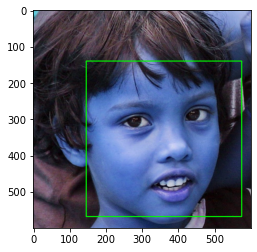

In [1]:
# Importing OpenCV package
import cv2
  
# Reading the image
img = cv2.imread('archive/real_and_fake_face_detection/real_and_fake_face/training_real/real_00001.jpg')
  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# cv2.imshow('Detected faces', img)
import matplotlib.pyplot as plt
plt.imshow(img)
# cv2.waitKey(0)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Q3 Clustering

In [3]:
import skimage
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

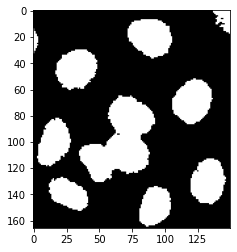

In [8]:
image = cv2.imread('tounching_grayscale.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,'gray')
ret, thresh1 = cv2.threshold(image, 120, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)
plt.imshow(thresh1,'gray')

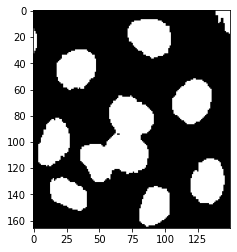

In [9]:
# Noise removal
kernel = np.ones((3),np.uint8)
opening_img = cv2.morphologyEx(thresh1,cv2.MORPH_OPEN, kernel, iterations =3)

plt.imshow(opening_img,'gray')

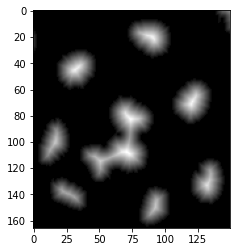

In [11]:
dist_transform = cv2.distanceTransform(opening_img, cv2.DIST_L2,0)
plt.imshow(dist_transform,'gray')

In [14]:
local_max_location = peak_local_max(dist_transform, min_distance=6)
local_max_boolean = peak_local_max(dist_transform, min_distance=6,indices=False)

print(local_max_boolean)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


C:\Users\KHADGA JYOTH ALLI\AppData\Local\Temp\ipykernel_14672\4016320351.py:2: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max_boolean = peak_local_max(dist_transform, min_distance=6,indices=False)


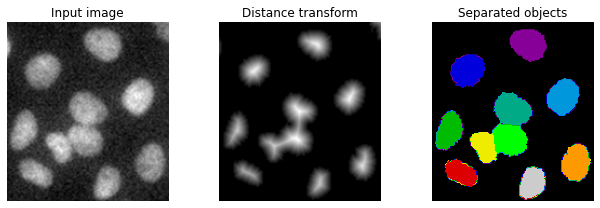

In [15]:
markers, _ = ndi.label(local_max_boolean)
segmented = skimage.segmentation.watershed(255-dist_transform, markers, mask=thresh1)
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Input image')
ax[1].imshow(dist_transform, cmap=plt.cm.gray)
ax[1].set_title('Distance transform')
ax[2].imshow(segmented, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

## Q4 shapes

In [1]:
from skimage.measure import label, regionprops

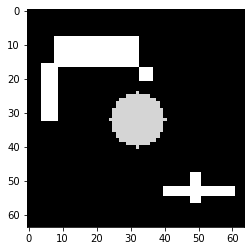

In [5]:
img = cv2.imread('shapes.png',cv2.IMREAD_GRAYSCALE)
ret1,thresh_img = cv2.threshold(img,100,1,cv2.THRESH_BINARY)
plt.imshow(img ,cmap ='gray')
plt.show()

No. of components is :  3


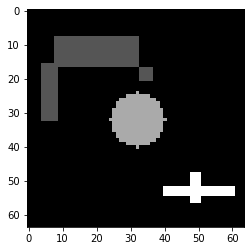

In [6]:
labelled_img,labels = label(thresh_img,connectivity=2,return_num=True) #  for 8 Neighborhood connectivity=2 
print("No. of components is : ",labels)
plt.imshow(labelled_img ,cmap ='gray')
plt.show()

Eccentricity: 0.8669446497443333
BBox (8, 4, 33, 37)
__________
Eccentricity: 0.0
BBox (24, 24, 41, 41)
__________
Eccentricity: 0.9486451162938622
BBox (48, 40, 57, 61)
__________


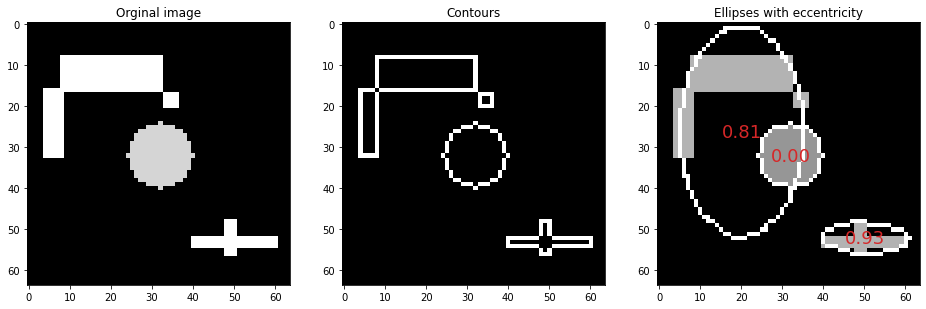

In [7]:
regions_propers = regionprops(labelled_img)
for region in regions_propers:
    print('Eccentricity:',region.eccentricity)
    print('BBox',region.bbox)
    print('_'*10)

plt.figure(figsize=[16,20])
plt.subplot(131)
plt.title('Orginal image')
plt.imshow(img,'gray')
# ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh_img, 1, 2)
blank = np.zeros(thresh_img.shape[:2],dtype='uint8')
cv2.drawContours(blank, contours, -1,(255, 0, 0), 1)
plt.subplot(132)
plt.title('Contours')
plt.imshow(blank,'gray')

def eccentricity(contour):
    """Calculates the eccentricity fitting an ellipse from a contour"""

    (x, y), (MA, ma), angle = cv2.fitEllipse(cnt)

    a = ma / 2
    b = MA / 2

    ecc = np.sqrt(a ** 2 - b ** 2) / a
    return (x,y), ecc

for cnt in contours:
    ellipse = cv2.fitEllipse(cnt)
    plt.subplot(133)
    plt.title('Ellipses with eccentricity')
    _ = cv2.ellipse(img,ellipse,(255,0,0),1)
    (x,y), ecc = eccentricity(cnt)
    text_kwargs = dict(ha='center', va='center', fontsize=18, color='C3')
    plt.text(x,y,f'{ecc:.2f}',**text_kwargs)
    plt.imshow(_,'gray')

## Q5

SURF – Speeded Up Robust Features
SURF is the speed up version of SIFT. In SIFT, Lowe approximated Laplacian of Gaussian with Difference of Gaussian for finding scale-space. SURF goes a little further and approximates LoG with Box Filter. One big advantage of this approximation is that, convolution with box filter can be easily calculated with the help of integral images. And it can be done in parallel for different scales. Also, the SURF rely on determinant of Hessian matrix for both scale and location. For orientation assignment, SURF uses wavelet responses in horizontal and vertical direction for a neighborhood of size 6s. Adequate guassian weights are also applied to it. The dominant orientation is estimated by calculating the sum of all responses within a sliding orientation window of angle 60 degrees. wavelet response can be found out using integral images very easily at any scale. SURF provides such a functionality called Upright-SURF or U-SURF. It improves speed and is robust upto . OpenCV supports both, depending upon the flag, upright. If it is 0, orientation is calculated. If it is 1, orientation is not calculated and it is faster.


### Harris Corner

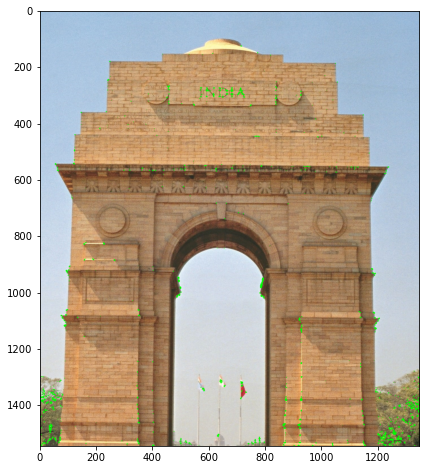

In [49]:
import cv2 as cv
img = cv.imread('download.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,5,5,0.04)
#result is dilated for marking the corners, not important
# dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,255,0]
plt.figure(figsize = (8,8))
plt.imshow(img,'gray')

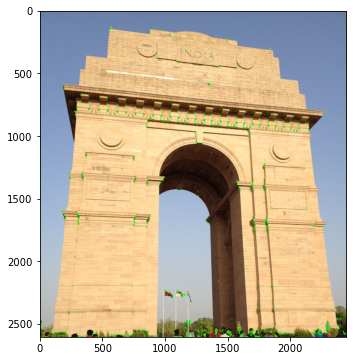

In [51]:
img = cv.imread('download (2).jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,7,9,0.04)
#result is dilated for marking the corners, not important
# dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,255,0]
plt.figure(figsize = (6,6))
plt.imshow(img,'gray')

## ORB


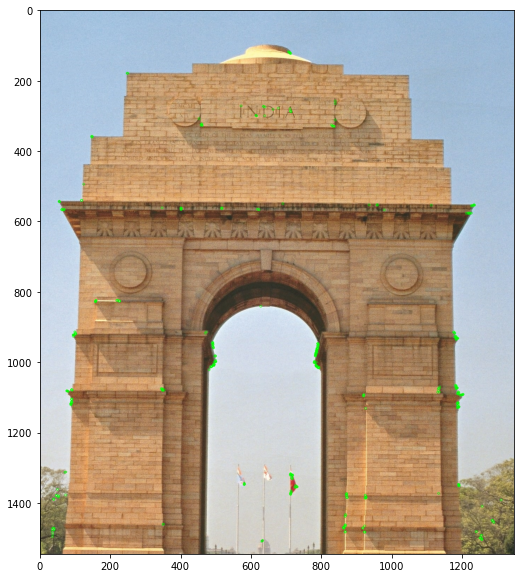

(<matplotlib.image.AxesImage at 0x23d34ea1a60>, None)

In [83]:
import cv2
img1 = cv2.imread('download.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img_g1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)

# Initiate STAR detector
orb  = cv.ORB().create()

# find the keypoints with ORB and compute the descriptors with ORB
kp1, des1 = orb.detectAndCompute(img_g1,None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img1,kp1,None,color=(0,255,0), flags=0)
plt.figure(figsize = (16,10))
plt.imshow(img2),plt.show()

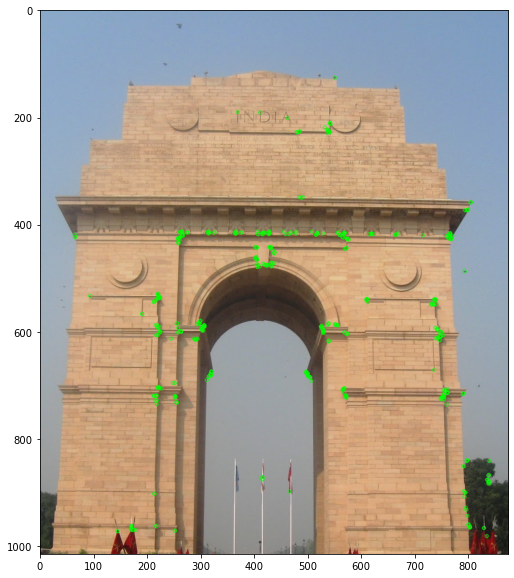

(<matplotlib.image.AxesImage at 0x23d001ac460>, None)

In [153]:
import cv2
img2 = cv2.imread('download (3).jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img_g1 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

# Initiate STAR detector
orb = cv2.ORB_create()

# find the keypoints with ORB and compute the descriptors with ORB
kp2, des2 = orb.detectAndCompute(img_g1,None)


# draw only keypoints location,not size and orientation
img21 = cv2.drawKeypoints(img2,kp2,None,color=(0,255,0), flags=0)
plt.figure(figsize = (16,10))
plt.imshow(img21),plt.show()

## ORB Matching

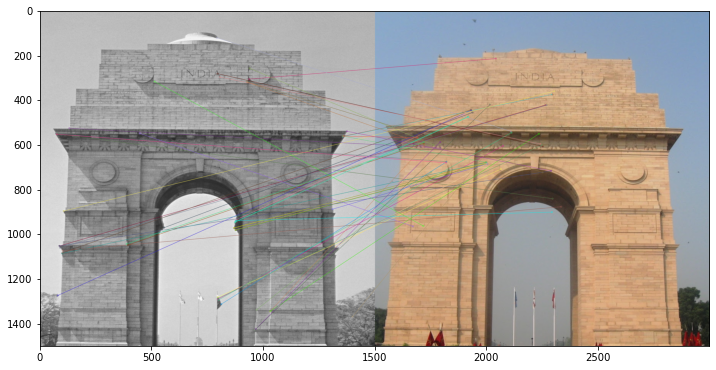

(<matplotlib.image.AxesImage at 0x23d50091970>, None)

In [154]:
img_g1= cv2.resize(img1,(1500,1500),cv2.INTER_AREA)
img_g2= cv2.resize(img2,(1500,1500),cv2.INTER_AREA)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img_g1,kp1,img_g2,kp2,matches[0:50],img_g1, flags=2)
plt.figure(figsize=(12,12))
plt.imshow(img3),plt.show()

## Applying Ransac and Homography

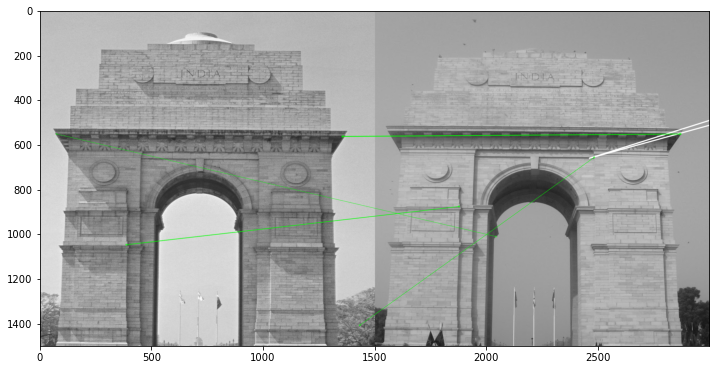

(<matplotlib.image.AxesImage at 0x23d198a51c0>, None)

In [157]:
img1 = cv2.imread('download.jpg',0)          # queryImage
img2 = cv2.imread('download (3).jpg',0) # trainImage
img1= cv2.resize(img1,(1500,1500),cv2.INTER_AREA)
img2= cv2.resize(img2,(1500,1500),cv2.INTER_AREA)


orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# if len(good)>MIN_MATCH_COUNT:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

# Using RANSAC to find the good matches and avoid outliers
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()

h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)

img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)



draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.figure(figsize=(12,12))
plt.imshow(img3, 'gray'),plt.show()

## Q6 HOG

In [8]:
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import os
from tqdm import tqdm
from random import shuffle
import pandas as pd

In [9]:
# path ="archive (1)/real_and_f#renaming real and fake directories
real = "archive/real_and_fake_face_detection/real_and_fake_face/training_real"
fake = "archive/real_and_fake_face_detection/real_and_fake_face/training_fake"
#we're creating a list of real and fake images
real_path = os.listdir(real)
fake_path = os.listdir(fake)


In [10]:
print(len(real_path))
print(len(fake_path))

1081
961


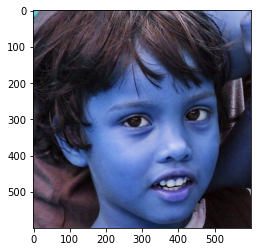

In [11]:
plt.imshow(cv2.imread(os.path.join(real, real_path[0])))

In [12]:
img_size = int(128)
def create_data():
    training_data = []
    y=[]
    for img in tqdm(real_path):
        path = os.path.join(real, img)
#         label = [1] 
        try:
            image = cv2.resize( cv2.imread(path,0), (img_size,img_size) )
            training_data.append(np.array(image))
            y.append(1)
        except:
            continue
        
    for img in tqdm(fake_path):
        path = os.path.join(fake, img)
#         label = [0] 
        try:
            image = cv2.resize(cv2.imread(path,0), (img_size,img_size))
            training_data.append(np.array(image))  
            y.append(0)
        except: continue
        
    return(training_data,y)


    

data_gray,labels = create_data()

100%|████████████████████████████████████████████████████████████████████████████████| 961/961 [00:09<00:00, 99.23it/s]


In [13]:
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

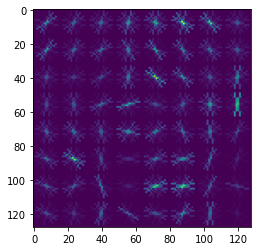

In [14]:
plt.imshow(hog_images[0])

In [15]:
labels =  np.array(labels).reshape(len(labels),1)

In [18]:
#What percentage of data you want to keep for training
percentage = 80
partition = int(len(hog_features)*percentage/100)

In [19]:
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()


In [20]:
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [21]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy: 0.6234718826405868


              precision    recall  f1-score   support

         0.0       0.61      0.55      0.58       191
         1.0       0.64      0.68      0.66       218

    accuracy                           0.62       409
   macro avg       0.62      0.62      0.62       409
weighted avg       0.62      0.62      0.62       409



## Q7 MNIST Classification

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import struct

In [23]:
with open('train-images-idx3-ubyte/train-images.idx3-ubyte', 'rb') as f:
    magic, size = struct.unpack('>II', f.read(8))
    nrows, ncols = struct.unpack('>II', f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8)).newbyteorder(">")
    data = data.reshape((size,nrows,ncols))
with open('train-labels-idx1-ubyte/train-labels.idx1-ubyte', 'rb') as i:
    magic, size = struct.unpack('>II', i.read(8))
    data_1 = np.fromfile(i, dtype=np.dtype(np.uint8)).newbyteorder(">") 
    
data, labels = data, data_1
# len(x_train), len(y_train)

5

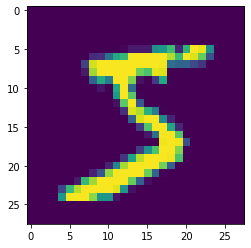

In [24]:
plt.imshow(data[0])
labels[0]

In [127]:
##HOG Descriptor
#Returns a 1D vector for an image
ppcr = 8
ppcc = 8
hog_images = []
hog_features = []
for image in tqdm(data):
#  blur = cv.GaussianBlur(image,(5,5),0) #Gaussian Filtering
 fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppcr,ppcc),cells_per_block=(2,2),block_norm= 'L2',visualize=True)
 hog_images.append(hog_image)
 hog_features.append(fd)
hog_features = np.array(hog_features)
hog_features.shape

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [01:03<00:00, 951.96it/s]


(60000, 128)

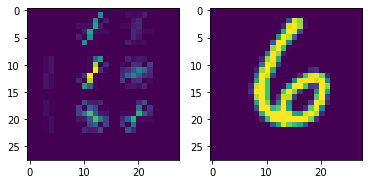

In [128]:
plt.subplot(121)
plt.imshow(hog_images[8911])
plt.subplot(122)
plt.imshow(data[8911])

In [129]:
labels = np.asarray(labels)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(hog_features,labels,test_size=0.2)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))
X_train.shape

Training data and target sizes: 
(48000, 128), (48000,)
Test data and target sizes: 
(12000, 128), (12000,)


(48000, 128)

In [134]:
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
classifier.fit(X_scaled, y_train)
X_test_scaled = scaler.fit_transform(X_test)
y_pred = classifier.predict(X_test_scaled)
test_accuracy = classifier.score(scaler.transform(X_test), y_test)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy: 0.94525


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1187
           1       0.97      0.99      0.98      1319
           2       0.96      0.93      0.95      1184
           3       0.93      0.93      0.93      1225
           4       0.95      0.91      0.93      1120
           5       0.97      0.94      0.95      1069
           6       0.97      0.99      0.98      1177
           7       0.94      0.91      0.92      1319
           8       0.94      0.91      0.92      1201
           9       0.87      0.95      0.91      1199

    accuracy                           0.95     12000
   macro avg       0.95      0.94      0.95     12000
weighted avg       0.95      0.95      0.95     12000



## Part II

## Q4 Optical Flow

### Dense Optical Flow

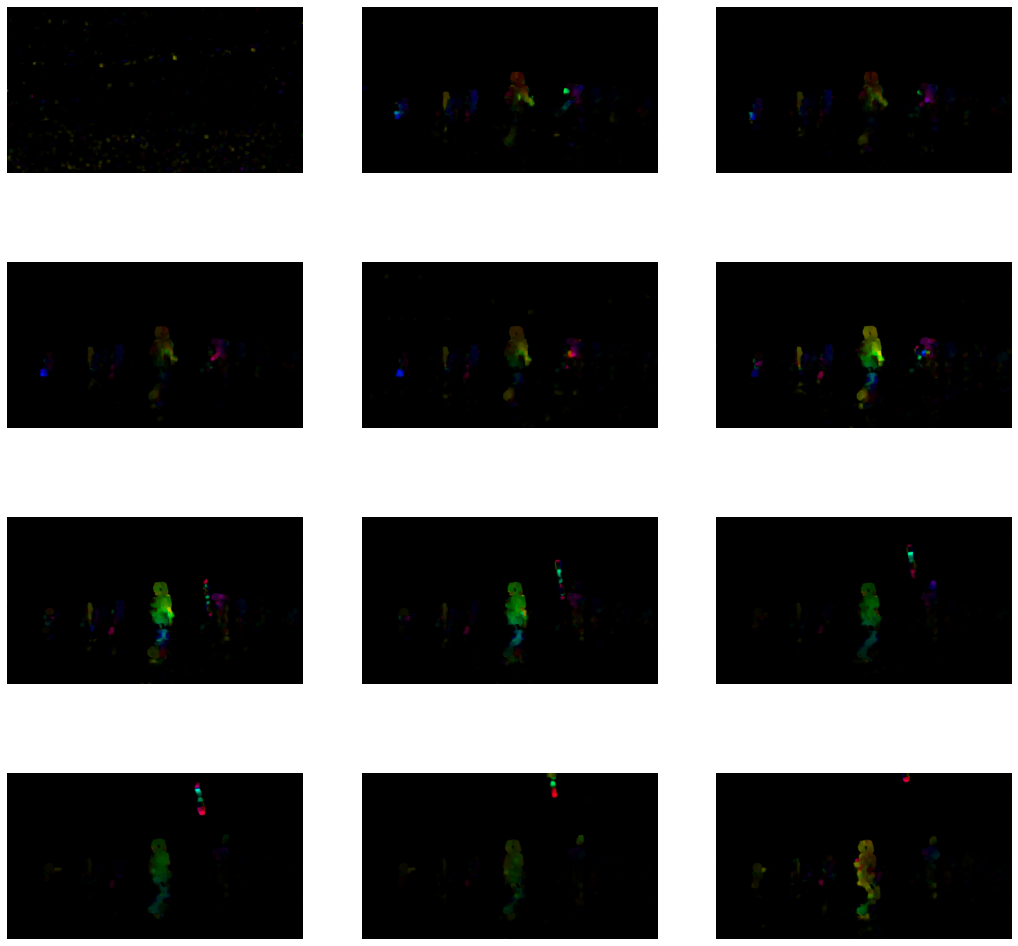

In [3]:
cap = cv2.VideoCapture("badminton_Trim.mp4")

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
i =1
plt.figure(figsize=(18, 18))
while(1):
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    if i<13:

        ax = plt.subplot(4,3,i)        
        plt.imshow(rgb)
        plt.axis("off")
        
    i += 1
    cv2.imshow('frame2',rgb)
    k = cv2.waitKey(30) & 0xff
    if not ret:
        break
    elif k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',rgb)
    prvs = next

cap.release()
cv2.destroyAllWindows()

### LK feature tracking

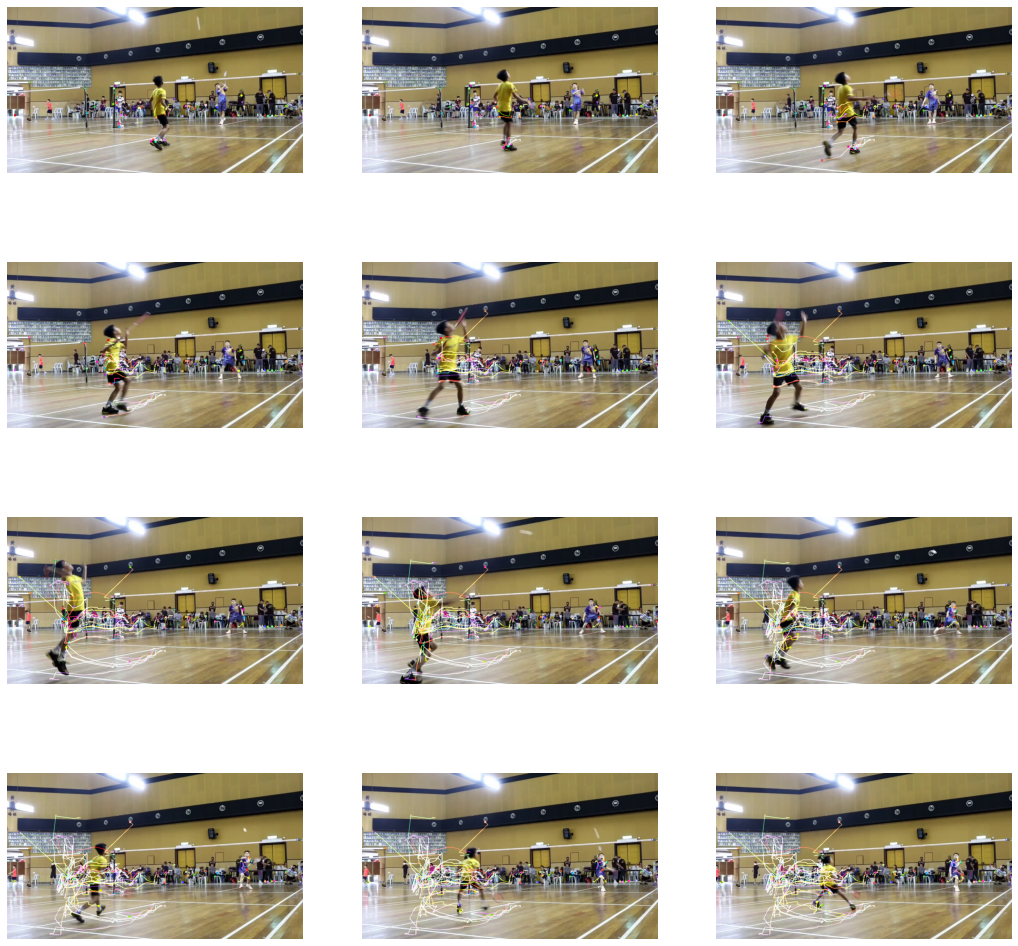

In [4]:
cap = cv2.VideoCapture('badminton_Trim.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 200,
                       qualityLevel = 0.4,
                       minDistance = 10,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
plt.figure(figsize=(18, 18))
j = 1
idx = 1
while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        a,b,c,d = int(a),int(b),int(c),int(d)
        mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    if j in np.linspace(10,100,num=12,dtype=int):
        plt.subplot(4,3,idx)
        plt.imshow(img[:,:,::-1])
        plt.axis("off")
        idx+=1
        
    j += 1
    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if not ret:
        break
    elif k == 27:
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cap.release()
cv2.destroyAllWindows()
